In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Fitting 5 folds for each of 2 candidates, totalling 10 fits
R² score on test dataset: 0.8711501280623167


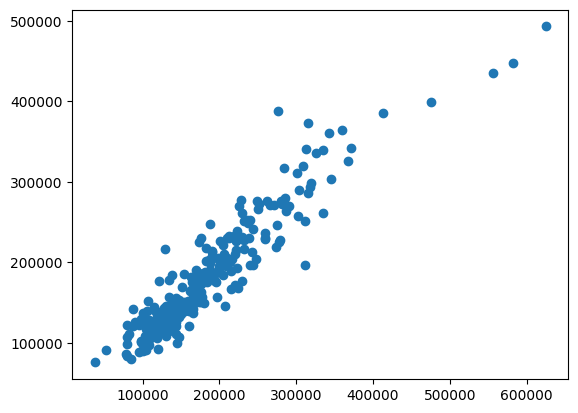

In [2]:
housing_prices = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv") 
x = housing_prices.drop(columns=['Id'])
y = x.pop("SalePrice")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) #Select categorical and numerical column names
x_cat_columns = x.select_dtypes(exclude="number").copy().columns
x_num_columns = x.select_dtypes(include="number").copy().columns

#Create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer())
 
#Create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

#Created the columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, x_num_columns),
        ("cat_pipe", categoric_pipe, x_cat_columns), 
    ]
) # Create a pipeline for preprocessing, scaling, and feature selection
pipeline_kbest_RF = make_pipeline(
    preprocessor,
    MinMaxScaler(),
    SelectKBest(score_func=f_regression, k=10)
)
# Use the pipeline to fit and transform the training data
x_train_kbest_RF = pipeline_kbest_RF.fit_transform(x_train, y_train)

# Transform the test set using the same pipeline
x_test_kbest_RF = pipeline_kbest_RF.transform(x_test) # Create a RandomForestRegressor instance with 100 trees
RF = RandomForestRegressor(n_estimators=100)

# Fit the RandomForestRegressor model on the transformed training set
RF.fit(X=x_train_kbest_RF, y=y_train)

# Make predictions on the transformed test set
RF_pred_kbest_RF = RF.predict(X=x_test_kbest_RF) #Create parameter grid
param_grid = {
    "max_features": ["sqrt"], 
    "max_depth":range(14,16),
}
#Define cross validation
search_RF = GridSearchCV(RF,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')  

search_RF.fit(X = x_train_kbest_RF, y = y_train) #Root mean squared error score 

from sklearn.metrics import mean_squared_log_error
rmse_score = mean_squared_log_error(y_test, RF.predict(X=x_test_kbest_RF) )
rmse_score 

import matplotlib.pyplot as plt

plt.scatter(y_test, RF.predict(X=x_test_kbest_RF)) 

from sklearn.metrics import r2_score

# Assuming select_model_rf is your trained model
# and x_test_selmod_rf is the transformed test dataset ready for prediction

# First, make predictions on the test dataset
predictions = RF.predict(X=x_test_kbest_RF)

# Then, calculate the R² score using the true labels of the test dataset and the predictions
r2 = r2_score(y_test, predictions)

print(f'R² score on test dataset: {r2}')



In [3]:
#Root mean squared error score 
from sklearn.metrics import mean_squared_log_error
rmse_score = mean_squared_log_error(y_test, predictions)
rmse_score

0.02235563406591601

In [4]:
submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission_df  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
# Assuming submission_df is already loaded as follows:
# submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Preprocess the Kaggle test dataset using the same pipeline
# Note: We're not calling fit_transform() here because we don't want to fit the preprocessing steps to the test data, just transform it
x_kaggle_test = submission_df.drop(columns=['Id'])  # Assuming 'Id' is not used in prediction
x_kaggle_test_transformed = pipeline_kbest_RF.transform(x_kaggle_test)

# Use the trained RandomForestRegressor model to predict SalePrice for the Kaggle test dataset
kaggle_test_predictions = RF.predict(x_kaggle_test_transformed)

# Assign the predictions to the submission DataFrame and prepare for submission
submission_df['SalePrice'] = kaggle_test_predictions

# Save the submission file
submission_df[['Id', 'SalePrice']].to_csv('house_prices_submission.csv', index=False)

# Print a message to indicate completion
print("Submission file 'house_prices_submission.csv' created.")


Submission file 'house_prices_submission.csv' created.
